In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Understand the Nature of the data.

## Read data && get quick stats

In [2]:
df = pd.read_csv('./datasets/sales.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
df.tail()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


In [4]:
df.shape

(896, 5)

In [5]:
df.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [7]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


# Data Analysis

In [8]:
df['Store_Area'].value_counts()

1439    5
1513    5
1458    5
1440    5
1539    5
       ..
1509    1
1339    1
1590    1
2169    1
1387    1
Name: Store_Area, Length: 583, dtype: int64

In [9]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [10]:
df.loc[df['Store_Area'] ==2229, :].sum()['Store_Sales']

87410

In [11]:
df.groupby(['Store_Area']).sum()['Store_Sales']

Store_Area
775     42530
780     25600
854     77740
869     52540
891     67370
        ...  
2063    51480
2067    70230
2169    67080
2214    65900
2229    87410
Name: Store_Sales, Length: 583, dtype: int64

In [12]:
# Visitors
top_10_stores_less_visitors = df.groupby(['Store_Area'])\
                                .agg({'Daily_Customer_Count':sum})\
                                .sort_values('Daily_Customer_Count').head(10).reset_index()
top_10_stores_by_visitors = df.groupby(['Store_Area'])\
                                .agg({'Daily_Customer_Count':sum})\
                                .sort_values('Daily_Customer_Count', ascending=False).head(10).reset_index()

# Stores
top_10_stores_less_sales = df.groupby(['Store_Area'])\
                                .agg({'Store_Sales':sum})\
                                .sort_values('Store_Sales').head(10).reset_index()
top_10_stores_by_sales = df.groupby(['Store_Area'])\
                                .agg({'Store_Sales':sum})\
                                .sort_values('Store_Sales', ascending=False).head(10).reset_index()






/Users/lelisra/Documents/vf/projects/tensorflow-vf/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


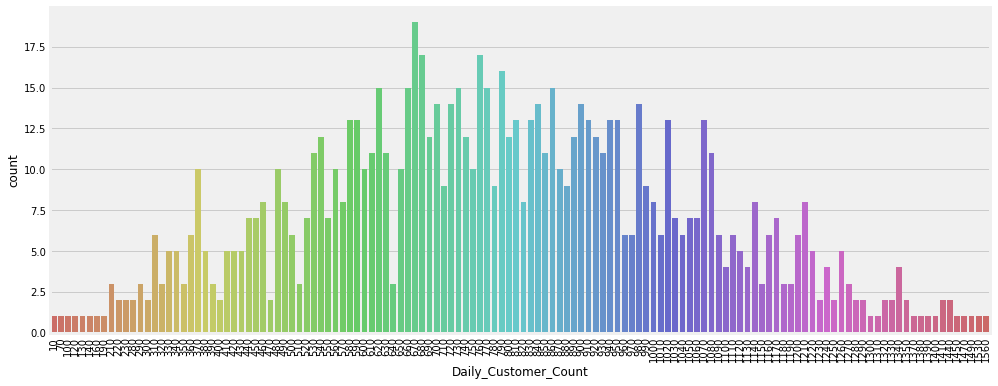

In [13]:
plt.figure(figsize=(15,6))
sns.countplot('Daily_Customer_Count', data=df,
             palette='hls')
plt.xticks(rotation=90)
plt.show()

In [15]:
# plt.figure(figsize=(15,6))
# sns.countplot('Daily_Customer_Count', data=stores_with_more_visitors,
#              palette='hls')
# plt.xticks(rotation=90)
# plt.show()


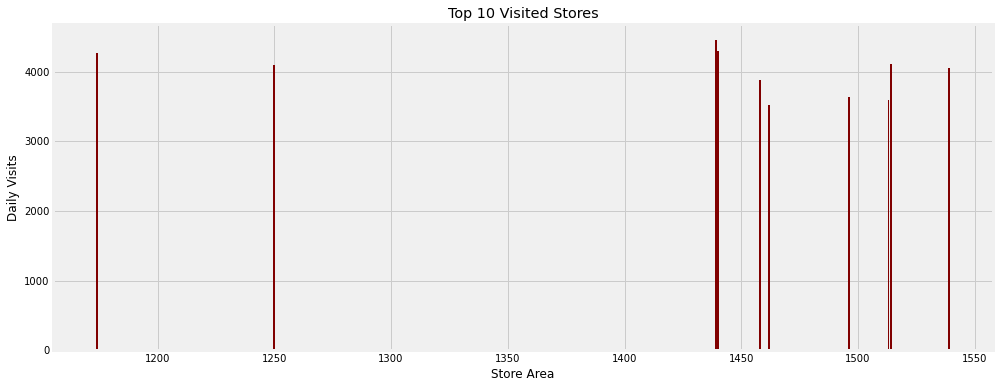

In [17]:
plt.figure(figsize=(15,6))
plt.bar(top_10_stores_by_visitors['Store_Area'],
        top_10_stores_by_visitors['Daily_Customer_Count'], 
        color ='maroon',
       )
plt.xlabel("Store Area")
plt.ylabel("Daily Visits")
plt.title("Top 10 Visited Stores")
plt.show()

In [18]:
top_10_stores_by_visitors

,Store_Area,Daily_Customer_Count
0,1439,4460
1,1440,4300
2,1174,4270
3,1514,4110
4,1250,4100
5,1539,4060
6,1458,3880
7,1496,3630
8,1513,3590
9,1462,3520
